In [ ]:
#zip= combines two lists element wise (list of lists)

inputs=[1,2,3,2.5]

weights=[[0.2,0.8,-0.5,1],
 [0.5,-0.91,0.26,-0.5],
  [-0.26,-0.27,0.17,0.87]]

biases=[2,3,0.5]

layer_output=[] #op of current layer
for neuron_weights, neuron_bias in zip (weights,biases):
  neuron_output=0
  for n_input, weight in zip (inputs,neuron_weights):
    neuron_output+=n_input*weight
  neuron_output+=neuron_bias
  layer_output.append(neuron_output)

print(layer_output)


[4.8, 1.21, 2.385]


In [ ]:
import numpy as np
inputs=[1,2,3,2.5]

weights=[0.2,0.8,-0.5,1]

biases=[2]           #tensor=object that can be represented as an array

op=np.dot(weights,inputs)+biases
print(op)


[4.8]


In [ ]:
import numpy as np
inputs=[1,2,3,2.5]

weights=[[0.2,0.8,-0.5,1],
 [0.5,-0.91,0.26,-0.5],
  [-0.26,-0.27,0.17,0.87]]

biases=[2,3,0.5]

op=np.dot(weights,inputs)+biases #put weights first then inputs
print(op)

#batches allow us to process things in parallel manner, also help in generalization

[4.8   1.21  2.385]


In [ ]:
import numpy as np
inputs=[[1,2,3,2.5],  #shape is 3,4
        [2,5,-1,2],
        [-1.5,2.7,3.3,-0.8]]

weights=[[0.2,0.8,-0.5,1], #shape is 3,4
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]

#to solve the problem of shape and dimension we transpose the weights matrix

biases=[2,3,0.5]

op=np.dot(inputs,np.array(weights).T)+biases
print(op)

#adding another layer in further cells


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


![dot.png]()

In [ ]:
import numpy as np
inputs2=[[1,2,3,2.5],  #shape is 3,4
        [2,5,-1,2],
        [-1.5,2.7,3.3,-0.8]]

weights2=[[0.1,-0.14,0.5], #shape is 3,4
         [-0.5,0.12,0.33],
         [-0.44,-0.73,0.13]]

biases2=[-1,2,-0.5]

layer1_op=np.dot(inputs,np.array(weights).T)+biases

layer2_op=np.dot(layer1_op,np.array(weights2).T)+biases2

print(layer2_op)

[[ 0.5031   0.53225 -3.18525]
 [ 0.2434  -2.6012  -3.0687 ]
 [-0.99314  1.4297  -1.88425]]


In [ ]:
import numpy as np

np.random.seed(0)

X=inputs2=[[1,2,3,2.5],
        [2,5,-1,2],
        [-1.5,2.7,3.3,-0.8]]

#hidden layer=how that layer changes

class layer_dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights=np.random.rand(n_inputs,n_neurons)
    self.baises=np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output=np.dot(inputs,self.weights)+self. baises

layer1=layer_dense(4,5)
layer2=layer_dense(5,2) #here the output from the layer 1 is 5 , so layer 2 cant have any other shape than 5

layer1.forward(X)

print(layer1.output)


[[ 4.43360009  3.22759454  6.17199267  7.1943905   3.57867638]
 [ 3.70963113  3.12985666  6.76158689  6.53879703  4.43350543]
 [ 3.46368304  1.83787994  2.71209321  4.21650818 -0.06178082]]


In [ ]:
import numpy as np

np.random.seed(0)

X=inputs2=[[1,2,3,2.5],
        [2,5,-1,2],
        [-1.5,2.7,3.3,-0.8]]

#hidden layer=how that layer changes

class layer_dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights=np.random.rand(n_inputs,n_neurons) # no need to transpose the weight matrix here since we can change the order of the matrices
    self.baises=np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output=np.dot(inputs,self.weights)+self. baises

layer1=layer_dense(4,5) #here we define the size of the input and the number of neurons
layer2=layer_dense(5,2) #here the output from the layer 1 is 5 , so layer 2 cant have any other shape than 5

layer1.forward(X)

print(layer1.output)
layer2.forward(layer1.output)
print(layer2.output)

[[ 4.43360009  3.22759454  6.17199267  7.1943905   3.57867638]
 [ 3.70963113  3.12985666  6.76158689  6.53879703  4.43350543]
 [ 3.46368304  1.83787994  2.71209321  4.21650818 -0.06178082]]
[[ 9.45712533 18.29222702]
 [ 9.12537555 17.7498138 ]
 [ 5.13074877  9.8956624 ]]


Activation functions

In [ ]:
#Rectified linear unit(ReLU)
#relu with 2neurons can be used as a bounded function from 0 to 1 (similar to step function                                                                                                       )

input=[0,2,-1,3.3,-2.7,1.1,2.2,-110]
op=[]
for i in input:
  if(i>0):
    op.append(i)
  else:
    op.append(0)
print(op)

for i in input:
  op.append(max(0,i))
print(op)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [ ]:
import math
layer_output=[4.8,1.21,2.385]
E=math.e

exp_values=[]
for i in layer_output:
  exp_values.append(E**i)
print(exp_values)

norm_base=sum(exp_values)
norm_values=[]
for i in exp_values:
  norm_values.append(i/norm_base)
print(norm_values)
print(sum(norm_values))


[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class layer_dense:
  def __init__(self,n_inputs,n_neurons):
    self.weights=np.random.rand(n_inputs,n_neurons) # no need to transpose the weight matrix here since we can change the order of the matrices
    self.baises=np.zeros((1,n_neurons))
  def forward(self,inputs):
    self.output=np.dot(inputs,self.weights)+self. baises

class activation_ReLU:
  def forward(self,inputs):
    self.output=np.maximum(0,inputs)


class activation_softmax:
  def forward(self,inputs):
    exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
    prob=exp_values/np.sum(exp_values,axis=1,keepdims=True)
    self.output=prob

class loss:
  def calculate(self,output,y): # y is target value
    sample_losses=self.forward(output,y)
    data_loss=np.mean(sample_losses)
    return data_loss

class loss_categorialcrossentropy(loss):
  def forward(self,y_pred,y_true):
    samples=len(y_pred)
    y_pred_clipped= np.clip(y_pred, 1e-7, 1-1e-7)

    if len(y_true.shape)==1:
      correct_confidences=y_pred_clipped[range(samples),y_true]
    elif len(y_true.shape)==2 :
      correct_confidences=np.sum(y_pred_clipped*y_true, axis=1)

    negetive_log_lk=-np.log(correct_confidences)
    return negetive_log_lk


X,y=spiral_data(100,3)

dense1=layer_dense(2,3) #layer defining
activation1=activation_ReLU() #relu for hidden

dense2=layer_dense(3,3)
activation2=activation_softmax() #softmax for output

dense1.forward(X)        #forward
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

#print(activation2.output[:5])

loss_function=loss_categorialcrossentropy()
loss=loss_function.calculate(activation2.output,y)

print("loss:",loss)

loss: 1.0977035


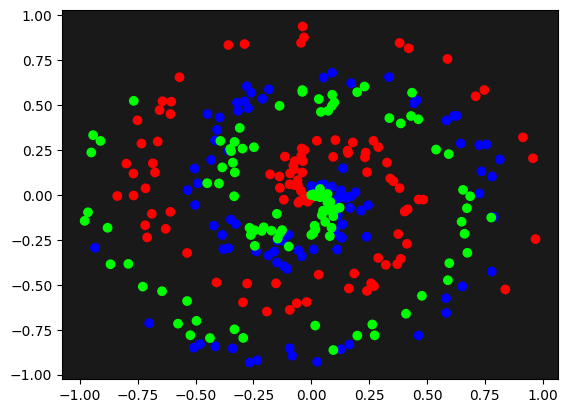

In [ ]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

ax = plt.axes()
ax.set_facecolor("black")
ax.patch.set_alpha(0.9)

X,y =spiral_data(samples=100,classes=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="brg")

plt.show()

In [ ]:
import matplotlib as plt
import nnfs

from nnfs.datasets import spiral_data
from nnfs.datasets import vertical_data

nnfs.init()

#X,y=vertical_data(samples=100,classes=3)
X,y=spiral_data(samples=100,classes=3)

dense1=layer_dense(2,3)
activation1=activation_ReLU()
dense2=layer_dense(3,3)
activation2=activation_softmax()

loss_function=loss_categorialcrossentropy()
lowest_loss=9999999
best_dense1_weights=dense1.weights.copy()
best_dense1_baises=dense1.baises.copy()
best_dense2_weights=dense2.weights.copy()
best_dense2_baises=dense2.baises.copy()

for iteration in range(100000):
  dense1.weights+=0.05*np.random.randn(2,3)
  dense1.baises+=0.05*np.random.randn(1,3)
  dense2.weights+=0.05*np.random.randn(3,3)
  dense2.baises+=0.05*np.random.randn(1,3)

  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  loss=loss_function.calculate(activation2.output,y)

  prediction=np.argmax(activation2.output,axis=1)
  accuracy=np.mean(prediction==y)

  if(loss<lowest_loss):
    print("new set of weights found,iteration:",iteration,"loss:",loss,"acc:",accuracy)
    best_dense1_weights=dense1.weights.copy()
    best_dense1_baises=dense1.baises.copy()
    best_dense2_weights=dense2.weights.copy()
    best_dense2_baises=dense2.baises.copy()
    lowest_loss=loss
  else:
    dense1.weights=best_dense1_weights.copy()
    dense1.baises=best_dense1_baises.copy()
    dense2.weights=best_dense2_weights.copy()
    dense2.baises=best_dense2_baises.copy()



new set of weights found,iteration: 0 loss: 1.097464 acc: 0.3333333333333333
new set of weights found,iteration: 8 loss: 1.0968142 acc: 0.3566666666666667
new set of weights found,iteration: 11 loss: 1.0951763 acc: 0.36666666666666664
new set of weights found,iteration: 14 loss: 1.0948466 acc: 0.38
new set of weights found,iteration: 16 loss: 1.094087 acc: 0.37333333333333335
new set of weights found,iteration: 18 loss: 1.0927956 acc: 0.3566666666666667
new set of weights found,iteration: 19 loss: 1.0927122 acc: 0.41
new set of weights found,iteration: 35 loss: 1.0918893 acc: 0.33666666666666667
new set of weights found,iteration: 55 loss: 1.0914279 acc: 0.3566666666666667
new set of weights found,iteration: 64 loss: 1.0911314 acc: 0.33
new set of weights found,iteration: 67 loss: 1.0910538 acc: 0.41
new set of weights found,iteration: 70 loss: 1.0897763 acc: 0.39
new set of weights found,iteration: 85 loss: 1.0889299 acc: 0.4066666666666667
new set of weights found,iteration: 97 loss: